# Biblical and Apocryphal Citations in Sermon Marginalia 

In [1]:
import sys
sys.path.append('../')
from lib.visualization import * 
from lib.dictionaries.authors import * 
from collections import Counter
import pandas as pd
sermons_metadata = pd.read_csv("../assets/sermons.csv")
# excluded = ['B07519','A87349'] # Welsh language 
sermons = sorted(sermons_metadata["id"])
# 4237 sermons in total 

In [5]:
import json,re

def read_data(tcpID): 
    with open(f'../assets/encoded/{tcpID}.json','r') as file:
        encodings, citations, sent_info = json.load(file)
    return encodings, citations, sent_info

def get_tcpIDs(prefix): 
    return [x for x in sermons if prefix in x]

In [49]:
def read_citations(tcpID): 
    with open(f'../assets/encoded/{tcpID}.json','r') as file:
        citations,sentences = json.load(file)[1:]
    citations_info = []
    for sent_idx,c_dict in citations.items(): 
        for cited in c_dict[0].values():
            for item in cited:
                if len(item) == 0: continue
                citations_info.append({'tcpID':tcpID, 
                                    'sent_idx': sent_idx,
                                    'sermon_idx': sentences[sent_idx][0],
                                    'paragraph_idx': sentences[sent_idx][1],
                                    'citation': item})
    return citations_info

In [ ]:
# save all citations
import csv
all_citations = []
for idx, tcpID in enumerate(sermons): 
    print(tcpID)
    all_citations.extend(read_citations(tcpID))
    if idx+1 % 100 == 0: print(idx+1,"read")
with open("../outputs/citations.csv","w+") as outfile: 
    writer = csv.DictWriter(outfile, fieldnames=all_citations[0].keys())
    writer.writeheader()
    writer.writerows(all_citations)

In [51]:
del all_citations

In [4]:
import json
def read_orig_citations(tcpID): 
    with open(f'../assets/encoded/{tcpID}.json','r') as file:
        data = json.load(file)
    encodings,sentences = data[0],data[2]
    citations = data[1]
    c_count = 0
    for sent_idx,c_dict in citations.items(): 
        # print(c_dict[0],len(c_dict[0]))
        c_count += len(c_dict[0])
    print(c_count)
    citations_info = []
    current = []
    for sent_idx, encoded in encodings.items():
        if sent_idx in citations: 
            print(citations[sent_idx][0])
        for token in encoded: 
            if token[-1] not in ["B-REF", "I-REF","B-REF-VERSE",'I-REF-VERSE']:
                if len(current) > 0: 
                    citations_info.append(citations_info.append({'tcpID':tcpID, 
                                        'sent_idx': sent_idx,
                                        'sermon_idx': sentences[sent_idx][0],
                                        'paragraph_idx': sentences[sent_idx][1],
                                        'citation': " ".join(current)}))
                    print(current)
                    current = []
                if token[1].lower().strip(".") in ["ibid","ibidem"]:
                    current.append(token[1])
                else: 
                    continue
            else: 
                current.append(token[1])
        if len(current) > 0: 
            citations_info.append(citations_info.append({'tcpID':tcpID, 
                                'sent_idx': sent_idx,
                                'sermon_idx': sentences[sent_idx][0],
                                'paragraph_idx': sentences[sent_idx][1],
                                'citation': " ".join(current)}))
    return citations_info

In [5]:
# save all citations
import csv
all_citations = []
for idx, tcpID in enumerate(sermons): 
    if tcpID != 'A41135': continue
    print(tcpID)
    all_citations.extend(read_orig_citations(tcpID))
    print(all_citations)
    if idx+1 % 100 == 0: print(idx+1,"read")
with open("../outputs/orig_citations.csv","w+") as outfile: 
    writer = csv.DictWriter(outfile, fieldnames=all_citations[0].keys())
    writer.writeheader()
    writer.writerows(all_citations)

A41135
380
{'0': ['Colossians 3.2']}
['COLOS.', '3.', '2.']
['ver.', '5.']
['ver.', '1.']
{'0': ['Romans 7.5']}
['Rom.', '7.', '5.']
{'0': ['Psalms 119.59']}
['Psal.', '119.', '59.']
{'0': ['Psalms 119.101'], '1': ['Romans 3.15']}
['Psal.', '119.', '101.']
['Rom.', '3.', '15.']
{'0': ['Hebrews 11.7']}
['H^b.', '11.', '7.']
{'0': ['Acts 17.5']}
['Act.', '17.', '5.']
{'0': ['1 Thessalonians 2.8']}
['1', 'Thes.', '2', '8.']
{'0': ['1 Peter 1.12'], '1': ['James 2.19']}
['1', 'Pe.', '1.', '12.']
['Jam.', '2.', '19.', 'I']
{'0': ['Lamentations 3.51']}
['Lam.', '3.', '51.']
{'0': ['1 Chronicles 29.3']}
['1', 'Chron.', '29.', '3.']
{'0': ['Psalms 119.139'], '1': ['Ezra 9.6']}
['Psalm.', '119.', '139.']
['Ezr.', '9.', '6.']
{'0': ['Judith 16.9'], '1': ['Genesis 37']}
['Iudith', '16.', '9.']
{'0': ['Romans 8.26']}
['Rom.', '8.', '26.']
{'0': ['Romans 1.26']}
['Rom', '1.', '26.']
{'0': ['Hosea 11.7']}
['Hos.', '11.', '7.']
{'0': ['Psalms 141.4']}
['Psal.', '141.', '4.']
{'0': ['James 9.17']}
['Ja

AttributeError: 'NoneType' object has no attribute 'keys'

In [14]:
encodings = {}
citations = {}
sent_info = {}
prefix = 'A0'
for tcpID in get_tcpIDs(prefix): 
    data = read_data(tcpID)
    encodings[tcpID] = data[0]
    citations[tcpID] = data[1]
    sent_info[tcpID] = data[2] 
    if len(encodings) % 100 == 0: print(len(encodings),"read")

100 read
200 read
300 read
400 read


In [38]:
counts = {}
for tcpID, cited in citations.items():
    c_count, o_count = 0,0
    for c in cited.values():
        for item in c[0].values(): c_count += len(item)
        for item in c[1].values(): o_count += len(item)
    counts[tcpID] = (c_count, o_count)
print(sum([x[0] for x in counts.values()]), sum([x[1] for x in counts.values()]))

805888 89


# Corruption and Uncertainty 

### Chapter and Verse Level

In [15]:
catalog = {}
for tcpID,c_dict in citations.items(): 
    for cited in c_dict.values():
        for item in cited[0].values():
            for c in item: 
                if len(c) == 0: continue
                c = c.split(" ")
                if tcpID not in catalog: 
                    catalog[tcpID] = {'only_chapter':0,'verse':0,'corrupted_book':0,'corrupted_ch_only':0,'corrupted_v_only':0,'all_corrupt':0}
                if re.match(r'[\d\^]',c[0]): # numbered book with unknown number
                    if c[0] == '^': 
                        catalog[tcpID]['corrupted_book'] += 1 
                        continue
                    book = f"{c[0]} {c[1]}"
                    ref = c[2]
                else: 
                    book = c[0]
                    ref = c[1]
                ref = ref.split(".")
                chapter = ref[0]
                if re.search(r"\*|\^",chapter) and len(ref) < 2: 
                    # chapter-only citations with illegible characters 
                    catalog[tcpID]['corrupted_ch_only'] += 1 
                elif len(ref) == 2: 
                    verse = ref[1] 
                    if re.search(r"\*|\^",verse): 
                        if re.search(r"\*|\^",verse): 
                            # both chapter and verse are uncertain 
                            catalog[tcpID]['all_corrupt'] += 1 
                        else: 
                            # verse is uncertain 
                            catalog[tcpID]['corrupted_v_only'] += 1 
                    else: 
                        catalog[tcpID]['verse'] += 1 
                else: 
                    catalog[tcpID]['only_chapter'] += 1 

        for tcpID, dict in catalog.items():
            corrupt = dict["all_corrupt"] + dict["corrupted_v_only"] + dict["corrupted_ch_only"] + dict["corrupted_book"]
            total = dict["verse"] + corrupt + dict["only_chapter"]
            corrupt_ratio = 0 
            if total > 0: 
                corrupt_ratio = corrupt/total
            catalog[tcpID]['corrupt_ratio'] = corrupt_ratio 
            catalog[tcpID]['total'] = total
            
        sorted_catalog = sorted(catalog, key= lambda x: (catalog[x]['corrupt_ratio'],
                                                        catalog[x]['total']),reverse=True)

Counts

In [16]:
total = sum(catalog[tcpID]['total'] for tcpID in catalog)
clean_ch = sum(catalog[tcpID]['only_chapter'] for tcpID in catalog)
clean_v = sum(catalog[tcpID]['verse'] for tcpID in catalog)
corrupted_book = sum([dict['corrupted_book'] for dict in catalog.values()])
corrupted_ch = sum([dict['corrupted_ch_only'] for dict in catalog.values()])
corrupted_v = sum([dict['corrupted_v_only'] for dict in catalog.values()])
all_corrupt = sum([dict['all_corrupt'] for dict in catalog.values()])
total_corrupted = corrupted_ch + corrupted_v + all_corrupt + corrupted_book
print(f"{total} total citations, with {total_corrupted} ({round((total_corrupted)/total,ndigits=2)*100}%) corrupted")
print(f"Of uncorrupted book citations, {clean_ch + corrupted_ch} ({round((clean_ch+corrupted_ch)/total,ndigits=4)*100}%) are chapter-level and {clean_v+corrupted_v+all_corrupt} ({round((clean_v+corrupted_v+all_corrupt)/total,ndigits=3)*100}%) are verse-level")
print(f"\t{corrupted_ch} ({round((corrupted_ch)/(clean_ch+corrupted_ch),ndigits=3)*100}%) chapter-only citations are corrupted")
print(f"\t{corrupted_v} ({round((corrupted_v)/(clean_v+corrupted_v+all_corrupt),ndigits=2)*100}%) verse citations are corrupted")
print(f"\t{all_corrupt}  ({round((all_corrupt)/(clean_v+corrupted_v+all_corrupt),ndigits=3)*100}%) citations are corrupted in both chapter and verse")
print(f"Of numbered book citations, {corrupted_book} ({round((corrupted_book)/total,ndigits=4)*100}%) are corrupted")

83540 total citations, with 2062 (2.0%) corrupted
Of uncorrupted book citations, 24769 (29.65%) are chapter-level and 58600 (70.1%) are verse-level
	910 (3.6999999999999997%) chapter-only citations are corrupted
	0 (0.0%) verse citations are corrupted
	981  (1.7000000000000002%) citations are corrupted in both chapter and verse
Of numbered book citations, 171 (0.2%) are corrupted


In [17]:
not_corrupted = []
low_corruption = []
high_corruption = []
for tcpID in sorted_catalog: 
    if catalog[tcpID]['corrupt_ratio'] == 0: 
        not_corrupted.append(tcpID)
    elif catalog[tcpID]['corrupt_ratio'] < 0.1: 
        low_corruption.append(tcpID)
    elif catalog[tcpID]['corrupt_ratio'] > 0.4: 
        high_corruption.append(tcpID)
print(len(not_corrupted), "texts without corrupted citations",len(low_corruption),"texts with a small proportion of corrupted citations")
print(len(high_corruption), "texts with a high ratio of corrupted citations")
print(len(sorted_catalog) - (len(not_corrupted) + len(low_corruption) + len(high_corruption)),'texts with a moderate ratio of corrupted citations')

185 texts without corrupted citations 208 texts with a small proportion of corrupted citations
6 texts with a high ratio of corrupted citations
28 texts with a moderate ratio of corrupted citations


Save stats to csv

In [18]:
import csv
outfile = open(f"../outputs/stats_{prefix}.csv","w+")
writer = csv.DictWriter(outfile, fieldnames=["tcpID", "only_chapter","verse","corrupted_book","corrupted_ch_only","corrupted_v_only","all_corrupt","corrupt_ratio","total"])
writer.writeheader()
for tcpID in sorted_catalog: 
    dict = catalog[tcpID]
    dict['tcpID'] = tcpID
    writer.writerow(dict)
outfile.close()

# Visualizations 

In [9]:
def author_citations(author): 
    tcpIDs = aut_tcpIDs[author]
    aut_citations = []
    for t in tcpIDs: 
        if t in citations: 
            aut_citations.append(citations[t])
    return aut_citations 

def get_citations(citations): 
    all_books = {}
    all_chapters = {}
    all_verses = {}
    for c_dict in citations: 
        for sent_idx, cited in c_dict.items():
            for item in cited[0].values():
                for c in item: 
                    if len(c) == 0: continue
                    c = c.split(" ")
                
                    if re.match(r'[\d\*]',c[0]): 
                        # numbered book with unknown number
                        if c[0] == '*':  
                            continue
                        book = f"{c[0]} {c[1]}"
                        ref = c[2]
                    else: 
                        book = c[0]
                        ref = c[1]
                    
                    if book not in all_books: all_books[book] = 0
                    all_books[book] += 1 

                    ref = ref.split(".")
                    chapter = ref[0]
                    if '*' not in chapter and "^" not in chapter: 
                        key = f"{book} {chapter}"
                        if key not in all_chapters: 
                            all_chapters[key] = 0
                        all_chapters[key] += 1 
                        if len(ref) == 2: 
                            verse = ref[1]
                            if '*' not in verse and "^" not in verse: 
                                key = f"{book} {chapter}.{verse}"
                                if key not in all_verses: 
                                    all_verses[key] = 0
                                all_verses[key] += 1 
    return all_books, all_chapters, all_verses

In [10]:
all_books, all_chapters,all_verses = get_citations(author_citations('Howes, John, 1613-1685'))

[('2 Chronicles', 6), ('Numbers', 4), ('Psalms', 3), ('Judges', 3), ('Romans', 3), ('Job', 2), ('Hebrews', 2), ('1 Samuel', 2), ('1 Chronicles', 2), ('1 Kings', 2), ('Revelation', 1), ('Acts', 1), ('Deuteronomy', 1), ('Isaiah', 1), ('1 Peter', 1), ('Kings', 1), ('Exodus', 1), ('2 Kings', 1), ('Malachi', 1)]


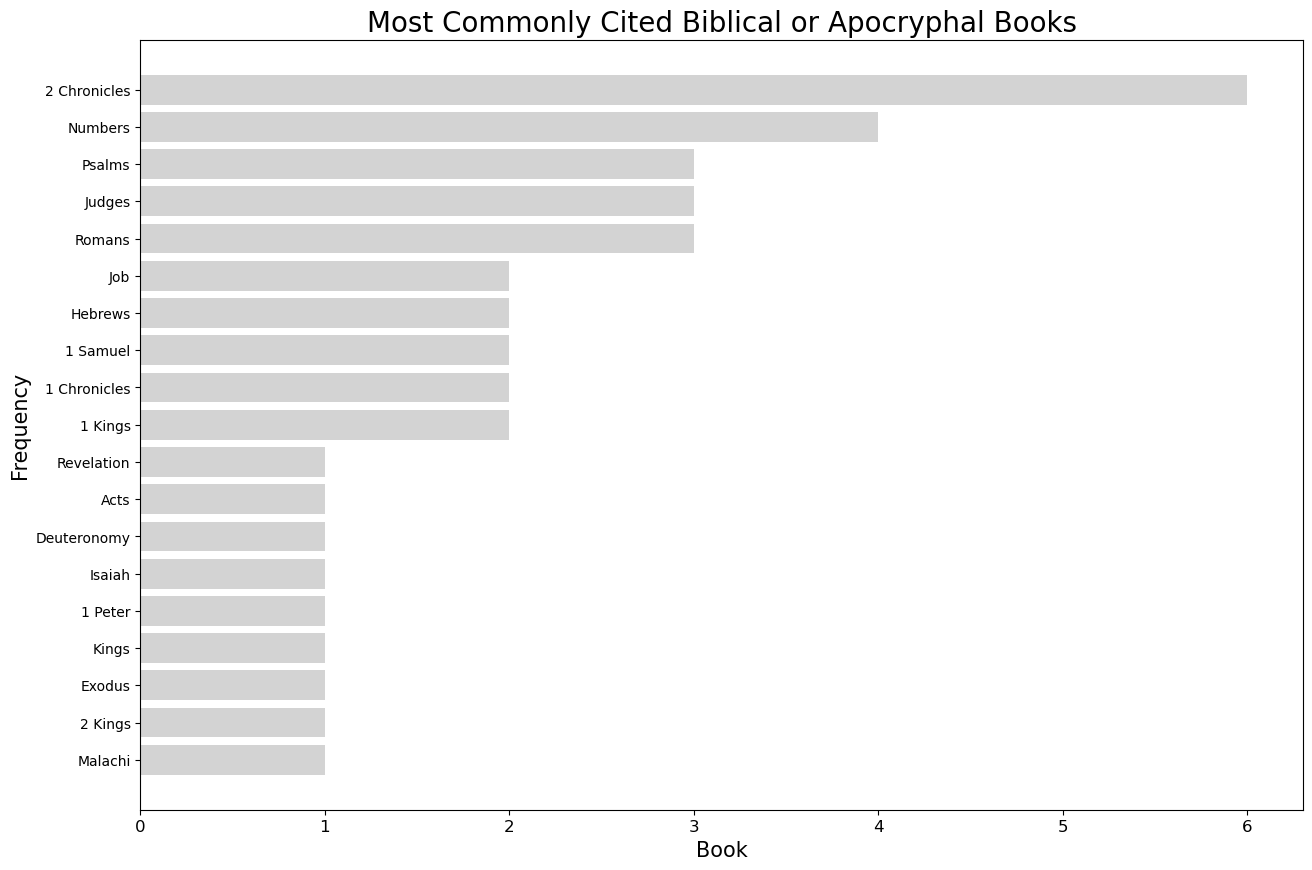

In [11]:
x,y = [],[]
counts = sorted(all_books.items(), key=lambda x:x[1],reverse=True)
print(counts[:26])
for word,freq in reversed(counts[:26]): 
    x.append(word)
    y.append(freq)
bar('horizontal',(x,y),'Most Commonly Cited Biblical or Apocryphal Books','lightgrey',('Book','Frequency'))

[('2 Chronicles 19', 4), ('Judges 16', 2), ('Romans 1', 2), ('2 Chronicles 26', 2), ('Job 4', 1), ('Job 40', 1), ('Numbers 8', 1), ('Revelation 1', 1), ('Acts 17', 1), ('Hebrews 2', 1), ('Psalms 45', 1), ('Deuteronomy 17', 1), ('1 Samuel 1', 1), ('Isaiah 49', 1), ('1 Peter 2', 1), ('1 Chronicles 26', 1), ('1 Chronicles 30', 1), ('1 Samuel 24', 1), ('Kings 4', 1), ('1 Kings 2', 1), ('Numbers 77', 1), ('1 Kings 1', 1), ('Psalms 47', 1), ('Psalms 82', 1), ('Judges 9', 1), ('Exodus 18', 1)]


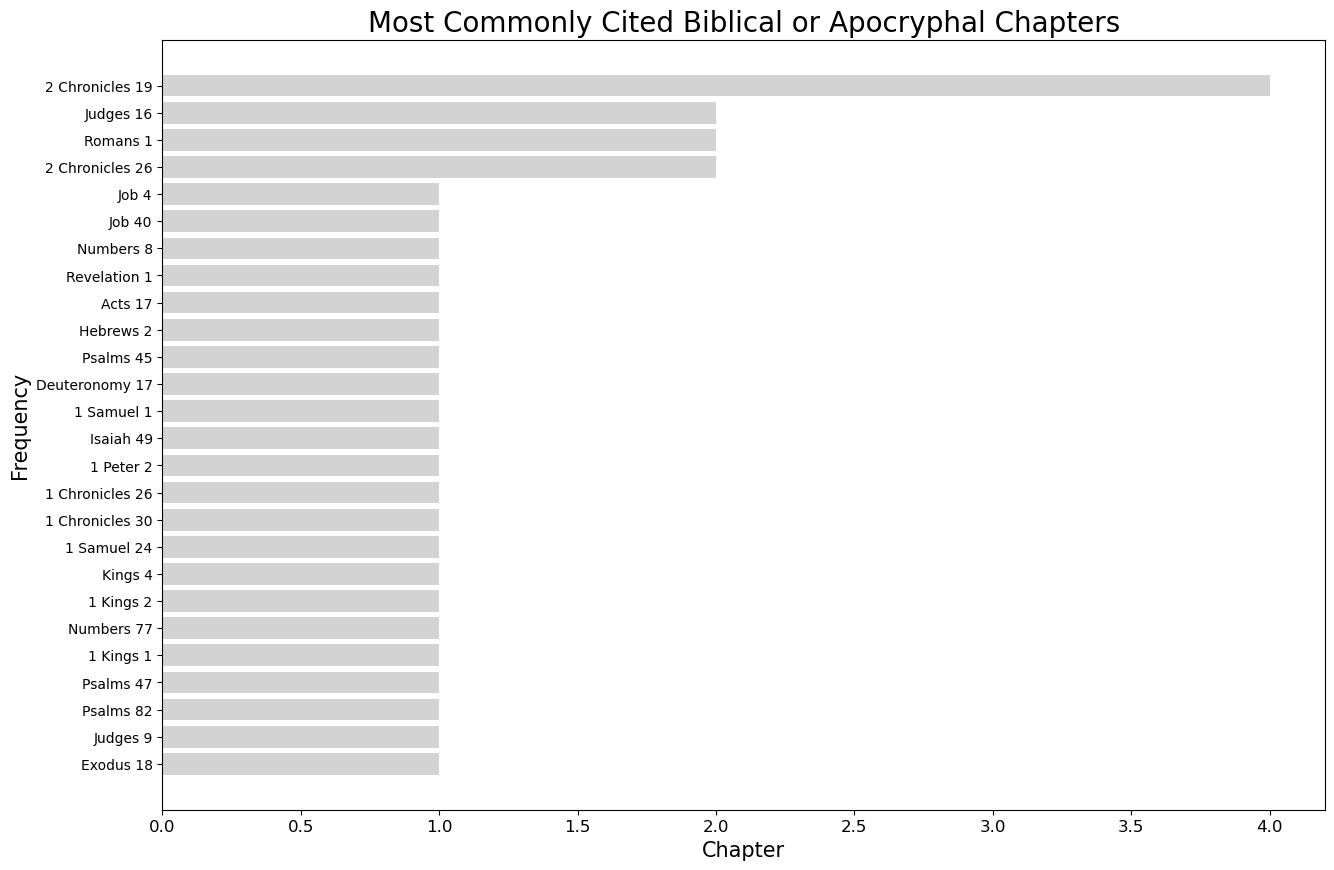

In [12]:
x,y = [],[]
counts = sorted(all_chapters.items(), key=lambda x:x[1],reverse=True)
print(counts[:26])
for word,freq in reversed(counts[:26]): 
    x.append(word)
    y.append(freq)
bar('horizontal',(x,y),'Most Commonly Cited Biblical or Apocryphal Chapters','lightgrey',('Chapter','Frequency'))

[('2 Chronicles 19.5', 1), ('2 Chronicles 19.6', 1), ('Job 4.1', 1), ('Job 40.15', 1), ('Numbers 8.99', 1), ('Revelation 1.8', 1), ('Acts 17.28', 1), ('Psalms 45.1', 1), ('Deuteronomy 17.15', 1), ('Isaiah 49.23', 1), ('Judges 16.20', 1), ('Judges 16.21', 1), ('1 Peter 2.13', 1), ('1 Chronicles 26.29', 1), ('1 Chronicles 30.1', 1), ('1 Samuel 24.5', 1), ('Kings 4.30', 1), ('1 Kings 2.35', 1), ('Romans 1.2', 1), ('Romans 1.5', 1), ('1 Kings 1.23', 1), ('Psalms 47.9', 1), ('Psalms 82.1', 1), ('Judges 9.10', 1), ('Exodus 18.13', 1), ('2 Kings 23.9', 1)]


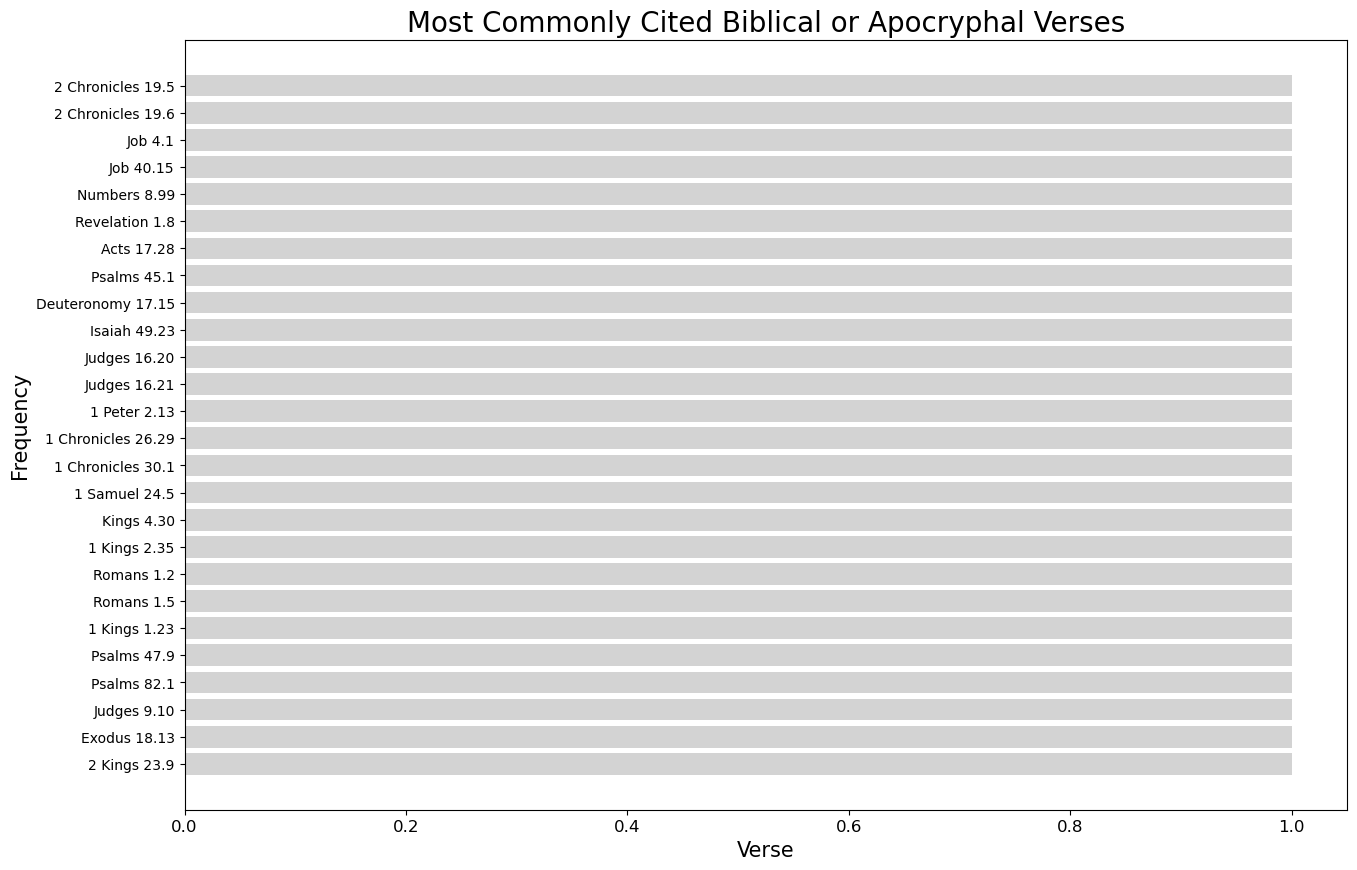

In [13]:
x,y = [],[]
counts = sorted(all_verses.items(), key=lambda x:x[1],reverse=True)
print(counts[:26])
for word,freq in reversed(counts[:26]): 
    x.append(word)
    y.append(freq)
bar('horizontal',(x,y),'Most Commonly Cited Biblical or Apocryphal Verses','lightgrey',('Verse','Frequency'))

## Misc

In [ ]:
# for tcpID, dict in catalog.items():
#     corrupt_verses = dict["all_corrupt"] + dict["corrupted_v_only"]
#     corrupt_chapters = dict["corrupted_ch_only"]
#     total_verses = dict["verse"]+corrupt_verses
#     total_chapters = dict["only_chapter"]+corrupt_chapters
#     if total_verses > 0: 
#         v_ratio = corrupt_verses/total_verses
#     if total_chapters > 0: 
#         c_ratio = corrupt_chapters/total_chapters
#     catalog[tcpID]['corrupt_ch_ratio'] = c_ratio 
#     catalog[tcpID]['corrupt_v_ratio'] = v_ratio 
# sorted_catalog = sorted(catalog, key= lambda x: (catalog[x]['corrupt_ch_ratio'], 
#                                                 catalog[x]['corrupt_v_ratio']))
# for tcpID in reversed(sorted_catalog): 
#     print(catalog[tcpID])

In [108]:
for item in formatting_outliers: 
    if len(item.split(" ")) > 2: 
        print(item)

amos 8 4 5-11
nehemiah 2 4-4 4-4 9-5 19-6 14-13 14-22-29
nehemiah 1 8-6 14-13 14-22-29-31
john 19 1-6-15
acts 14 14 15-8
revelation 7 7 8-10 11
11 4, 5, 7 8, 20, 21, 33-34
acts 2 24 32 3 15, 26 4 10 5 30 13-30, 33
john 5 24 3-18
hebrews 10 32-34 11 24-26
onepeter onepeter 4 12-19 3 14-17
twothessalonians 3 7 9-8
psalms 113 5 *-7
psalms 62 11-2-79 12
unknownpeter 2 19 20-26
onecorinthians onecorinthians 5 1 9-11 6 9-18 7 1
leviticus 4 3 29 33-5 6, 7 9 11-9 22-12 6, 8-14 13-16 16
matthew 17 10 11-11 14
psalms 42 3-10-69 19 80 5 6-89 50, 51-123 3, 4
onetimothy 1 4 6-2 7
genesis 30 35-37 13 14-42 1, 2, 3-43 15-47 1, 2, 3
john 14 1 15 11-16 33
onesamuel 20 30 33-22 8
psalms 25-94-55-42 143 2, 3
psalms 62 11-12-79 12
3 24 5, 15-17
revelation 3 5 21-21 7-22 5
90 5, 7, 8,-11
ecclesiasticus 33 5 7-13
jeremiah 9 5 2-8
james 2 5 1-4
twocorinthians 2 17-,
luke 24 9 10-50 51
2 12, 14,-19
onecorinthians onecorinthians 51 9-11 6 9-18 7 1,


In [57]:
# from collections import Counter
# from difflib import SequenceMatcher
# possible_abbrev = []
# for o in outliers: 
#     possible_abbrev.append(o.split(" ")[0]) 

# possible_abbrev = Counter(possible_abbrev).items()
# possible_matches = {k:[] for k in abbrev}
# for word,freq in possible_abbrev:
#     # print(word)
#     # finding possible matches to any of the known abbreviations for each book
#     if word not in abbrev_to_book: 
#         for ab, book in abbrev_to_book.items():
#             similarity = SequenceMatcher(None, ab, word).ratio()
#             if similarity >= 0.8:
#                 possible_matches[book].append((word,freq))
#                 break

In [58]:
# clean_format = []
# for book, variants in possible_matches.items(): 
#     for v,freq in variants:
#         clean_format.append(f"{book}: {v} {freq}\n") 
#     clean_format.append("\n")
# with open(f"../assets/possible_variants_2.txt","w+") as file: 
#     file.writelines(clean_format)

In [ ]:
# with open(f"../assets/possible_variants_2 copy.txt","r") as file: 
#     lines = file.readlines() 
# for line in lines: 
#     line = line.split(" ")
#     b, ab = line[0].strip(":"), line[1]
#     abbrev[b].append(ab)
# count = 0 
# for b,ab_list in abbrev.items(): 
#     print(f"'{b}':")
#     print("[")
#     for ab in sorted(set(ab_list)): 
#         print(f"\t'{ab}',")
#     print(f"],")